In [1]:
import pandas as pd

df_coffee= pd.read_feather("data/coffee_ratings_full.feather")
df_coffee

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,None,wolensu,None,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,78.75,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,None,robustasa,None,...,Blue-Green,1.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1334,78.08,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,None,robustasa,40,...,Blue-Green,0.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,795 meters,...,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1336,75.08,Robusta,cafe politico,India,None,None,None,14-1118-2014-0087,cafe politico,None,...,Green,1.0,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [2]:
coffee_focus= df_coffee[['variety','country_of_origin','flavor']]
coffee_focus =coffee_focus.reset_index()
coffee_focus

,index,variety,country_of_origin,flavor
0,0,None,Ethiopia,8.83
1,1,Other,Ethiopia,8.67
2,2,Bourbon,Guatemala,8.50
3,3,None,Ethiopia,8.58
4,4,Other,Ethiopia,8.50
...,...,...,...,...
1333,1333,None,Ecuador,7.58
1334,1334,None,Ecuador,7.67
1335,1335,None,United States,7.33
1336,1336,None,India,6.83


In [3]:
coffee_resamp = coffee_focus.sample(frac=1, replace=True)
coffee_resamp

,index,variety,country_of_origin,flavor
1300,1300,Bourbon,Mexico,6.67
469,469,Caturra,Colombia,7.67
1078,1078,Typica,Mexico,7.25
851,851,Hawaiian Kona,United States (Hawaii),7.83
561,561,Yellow Bourbon,Brazil,7.58
...,...,...,...,...
20,20,Other,United States,8.25
1220,1220,None,United States (Hawaii),6.83
1017,1017,Other,Myanmar,7.42
441,441,Bourbon,Guatemala,7.58


In [4]:
coffee_resamp['index'].value_counts()

index
394     6
195     6
809     5
93      5
1294    5
       ..
1169    1
203     1
1011    1
602     1
877     1
Name: count, Length: 844, dtype: int64

In [5]:
num_unique_coffees = len(coffee_resamp.drop_duplicates(subset='index'))
num_unique_coffees 

844

In [10]:
import numpy as np 

mean_flavors_1000 = []

for i in range(1000):
    mean_flavors_1000.append(np.mean(
        coffee_focus.sample(frac=1, replace= True)['flavor']))

(array([  1.,  16.,  59., 125., 204., 238., 184., 111.,  50.,  12.]),
 array([7.49579223, 7.50138191, 7.5069716 , 7.51256129, 7.51815097,
        7.52374066, 7.52933034, 7.53492003, 7.54050972, 7.5460994 ,
        7.55168909]),
 <BarContainer object of 10 artists>)

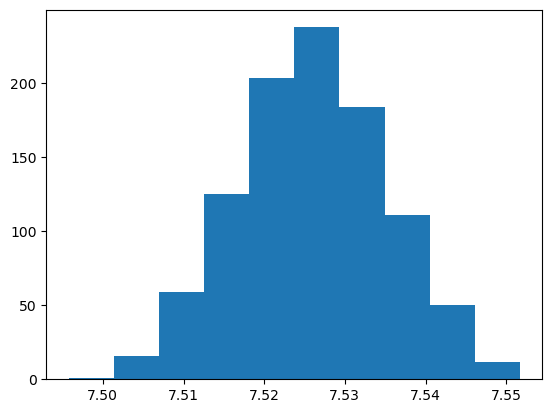

In [9]:
#Bootstrap distribution histogram
#

import matplotlib.pyplot as plt 
plt.hist(mean_flavors_1000)

In [11]:
#kahve veri setinden 500 satırlık bir örnek alalım.
coffee_sample = df_coffee[['variety','country_of_origin','flavor']].reset_index().sample(n=500)
coffee_sample

,index,variety,country_of_origin,flavor
625,625,Other,Thailand,7.33
1070,1070,Catuai,Honduras,7.33
53,53,SL14,Uganda,8.17
580,580,Bourbon,Guatemala,7.67
1058,1058,Bourbon,Guatemala,7.50
...,...,...,...,...
353,353,Caturra,Costa Rica,7.42
698,698,Caturra,Mexico,7.33
272,272,Typica,Mexico,7.67
155,155,Caturra,Colombia,7.67


In [12]:
import numpy as np 

mean_flavors_5000 = []

for i in range(5000):
    mean_flavors_5000.append(
        np.mean(coffee_sample.sample(frac=1, replace=True)['flavor'])
    )
    

In [13]:
#sample mean
coffee_sample['flavor'].mean()

7.53444

In [14]:
#populaiton mean
df_coffee['flavor'].mean()

7.526046337817639

In [ ]:
#bootstarp mean
np.mean(mean_flavors_5000
       
       
       )

In [15]:
#sample std
coffee_sample['flavor'].std()

0.3606377761843908

In [16]:
#bootstrap std= standart error
np.std(mean_flavors_5000,ddof=1)

0.016420622467861756

In [17]:
np.std(mean_flavors_5000,ddof=1)*np.sqrt(5000)

0.3671762807099924

(array([   4.,   37.,  185.,  733., 1380., 1454.,  867.,  289.,   45.,
           6.]),
 array([7.46846 , 7.481378, 7.494296, 7.507214, 7.520132, 7.53305 ,
        7.545968, 7.558886, 7.571804, 7.584722, 7.59764 ]),
 <BarContainer object of 10 artists>)

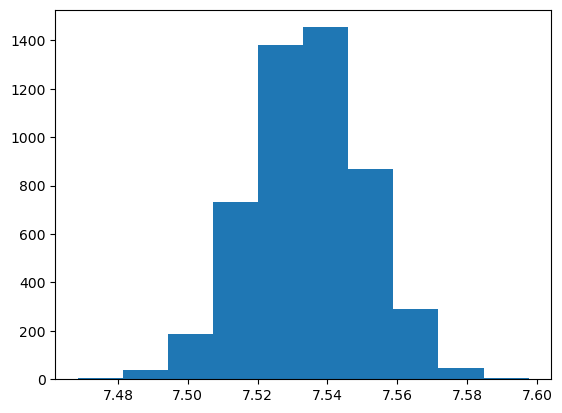

In [18]:
#bootstrap distrubiton of mean flavor

import matplotlib.pyplot as plt
plt.hist(mean_flavors_5000)

In [ ]:
#güven aralığı

In [ ]:
#nokta tahmininin ingilizcesi vizede sordu

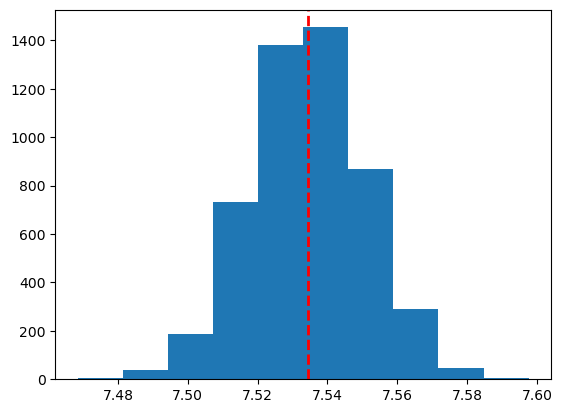

In [19]:
#bootstrap distrubiton of mean flavor an mean line
plt.hist(mean_flavors_5000);
plt.axvline(np.mean(mean_flavors_5000), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(mean_flavors_5000):.2f}')

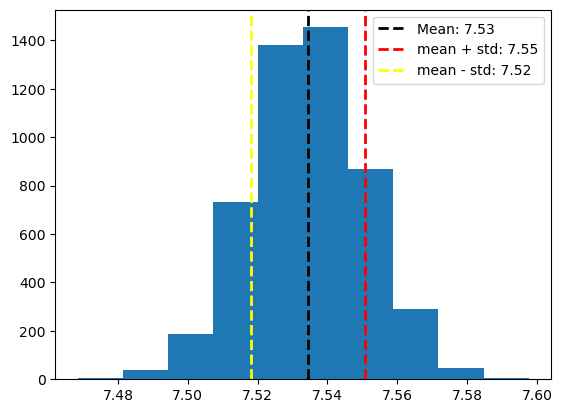

In [20]:
mean = np.mean(mean_flavors_5000)
plus_one_std = mean + np.std(mean_flavors_5000, ddof=1)
minus_one_std = mean - np.std(mean_flavors_5000, ddof=1)

plt.hist(mean_flavors_5000);

plt.axvline(mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.axvline(plus_one_std, color='red', linestyle='dashed', linewidth=2, label=f'mean + std: {plus_one_std:.2f}')

plt.axvline(minus_one_std, color='yellow', linestyle='dashed', linewidth=2, label=f'mean - std: {minus_one_std:.2f}')

plt.legend()

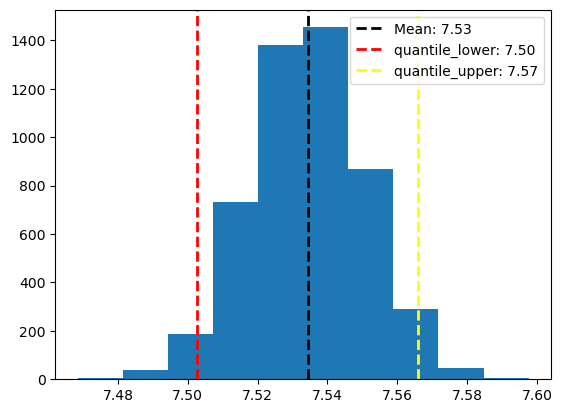

In [21]:
quantile_lower = np.quantile(mean_flavors_5000, 0.025)
quantile_upper = np.quantile(mean_flavors_5000, 0.975)

plt.hist(mean_flavors_5000);

plt.axvline(mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.axvline(quantile_lower, color='red', linestyle='dashed', linewidth=2, label=f'quantile_lower: {quantile_lower:.2f}')

plt.axvline(quantile_upper, color='yellow', linestyle='dashed', linewidth=2, label=f'quantile_upper: {quantile_upper:.2f}')

plt.legend()

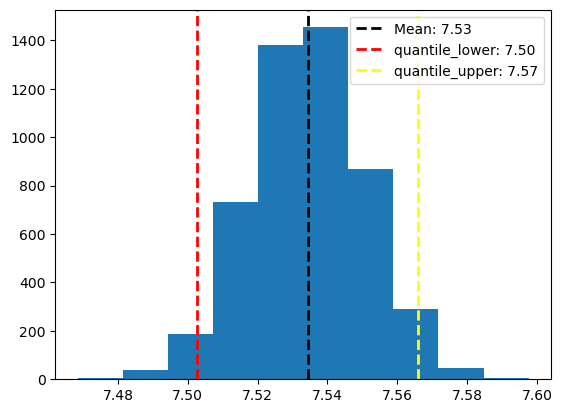

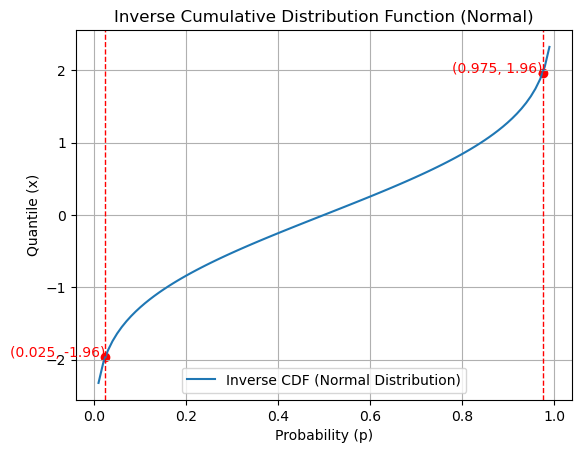

In [23]:
from scipy.stats import norm

p_values = np.linspace(0, 1, 100)

quantiles = norm.ppf(p_values, loc=0, scale=1)

plt.plot(p_values, quantiles, label="Inverse CDF (Normal Distribution)")

p1, p2 = 0.025, 0.975
quantile_025 = norm.ppf(p1)
quantile_975 = norm.ppf(p2)

plt.scatter([p1, p2], [quantile_025, quantile_975], color='red')  # Noktaları çiz
plt.axvline(p1, color='red', linestyle='dashed', linewidth=1)  # p1 için dikey çizgi
plt.axvline(p2, color='red', linestyle='dashed', linewidth=1)  # p2 için dikey çizgi

# X ve Y değerlerini grafikte gösterelim
plt.text(p1, quantile_025, f'({p1:.3f}, {quantile_025:.2f})', color='red', fontsize=10, ha='right')
plt.text(p2, quantile_975, f'({p2:.3f}, {quantile_975:.2f})', color='red', fontsize=10, ha='right')



plt.xlabel("Probability (p)")
plt.ylabel("Quantile (x)")
plt.title("Inverse Cumulative Distribution Function (Normal)")
plt.grid(True)
plt.legend()
plt.show()

In [24]:
point_estimate=np.mean(mean_flavors_5000)
point_estimate

7.53440658

In [25]:
std_error = np.std(mean_flavors_5000,ddof=1)
std_error

0.016420622467861756

In [26]:
from scipy.stats import norm
lower = norm.ppf(0.025, loc=point_estimate, scale=std_error)
upper = norm.ppf(0.975, loc=point_estimate, scale=std_error)

print(lower, upper)

7.502222751359262 7.566590408640738


In [28]:
import pandas as pd

df_stck=pd.read_feather("data/stack_overflow.feather")
df_stck

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,62812.0,I am a developer by profession,Yes,40.0,10.0,child,Yearly,145000.0,145000.0,United States,...,Too long,No,"Computer science, computer engineering, or sof...",Flask;jQuery,Angular;Angular.js;Flask;jQuery;React.js,Somewhat less welcome now than last year,50.0,30.0,20.0,At least 30
2257,62835.0,I am a developer by profession,Yes,23.0,9.0,child,Monthly,180000.0,33972.0,Russian Federation,...,Too short,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET Core;Flask,Just as welcome now as I felt last year,60.0,8.0,3.0,Under 30
2258,62837.0,I am a developer by profession,Yes,27.0,8.0,child,Monthly,7500.0,97284.0,Germany,...,Appropriate in length,No,Mathematics or statistics,None,None,Just as welcome now as I felt last year,42.0,12.0,2.0,Under 30
2259,62867.0,"I am not primarily a developer, but I write co...",Yes,33.0,13.0,child,Monthly,6000.0,72000.0,Panama,...,Too long,No,"Another engineering discipline (such as civil,...",None,Django;React.js,A lot less welcome now than last year,45.0,15.0,2.0,At least 30


In [29]:
#şimdi de elimizde olan verilere göre ortalama 
mean_comp_samp=df_stck['converted_comp'].mean()
mean_comp_samp

119574.71738168952

In [31]:
import numpy as np

so_boot_distn = []

for i in range(5000):
    so_boot_distn.append(
        np.mean(
            df_stck.sample(frac=1, replace=True)['converted_comp']
        )
    )

(array([  1.,   0.,   0.,   0.,   0.,   0.,   2.,   5.,  11.,   8.,  18.,
         28.,  50.,  44.,  70., 120., 122., 131., 192., 199., 237., 263.,
        275., 268., 305., 283., 294., 288., 268., 249., 233., 172., 152.,
        159., 141., 113.,  86.,  64.,  50.,  27.,  21.,  14.,  13.,   9.,
          9.,   2.,   1.,   1.,   1.,   1.]),
 array([ 98029.67713401,  98872.00038921,  99714.32364441, 100556.6468996 ,
        101398.9701548 , 102241.29341   , 103083.61666519, 103925.93992039,
        104768.26317559, 105610.58643078, 106452.90968598, 107295.23294118,
        108137.55619637, 108979.87945157, 109822.20270677, 110664.52596196,
        111506.84921716, 112349.17247236, 113191.49572755, 114033.81898275,
        114876.14223795, 115718.46549314, 116560.78874834, 117403.11200354,
        118245.43525874, 119087.75851393, 119930.08176913, 120772.40502433,
        121614.72827952, 122457.05153472, 123299.37478992, 124141.69804511,
        124984.02130031, 125826.34455551, 126668.6

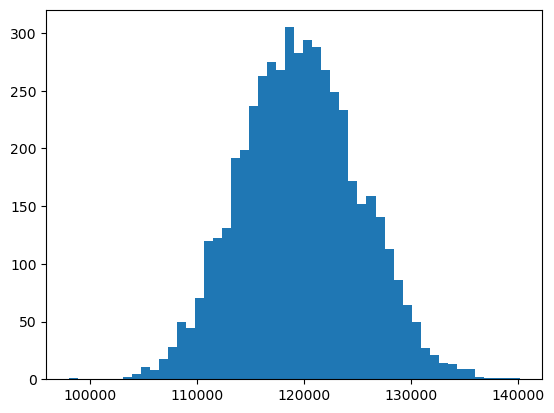

In [33]:
import matplotlib.pyplot as plt 
plt.hist(so_boot_distn,bins=50)
#50 parçaya bölmüş

In [32]:
std_error =np.std(so_boot_distn , ddof=1)
std_error

5533.193273612492

### z score

In [34]:
df_stck['converted_comp'].mean()

119574.71738168952

In [36]:
mean_comp_hyp=110000

In [37]:
std_error

5533.193273612492

In [38]:
z_score = (mean_comp_samp - mean_comp_hyp)/ std_error
z_score

1.7304144113943836

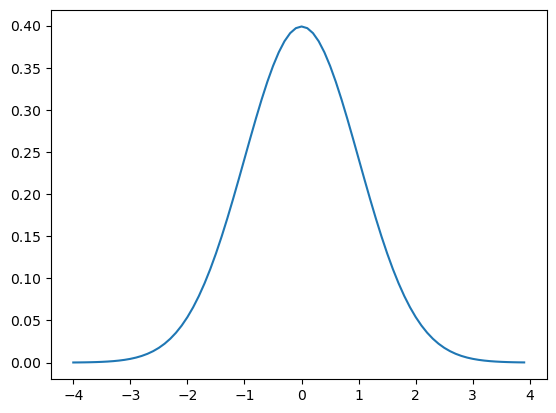

In [39]:
from scipy.stats import norm

z_data = np.arange(-4,4,0.1)

plt.plot(z_data , norm.pdf(z_data , loc=0, scale=1))
#pdf: olasılık yoğunluk fonk.

sağ kuyruk testi 
sol kuyruk testi
iki kuyruk
0 testinde farklı bi değer bulmka istiyosan